In [1]:
import pandas as pd
import numpy as np

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

from sklearn.tree import export_graphviz
import graphviz

import matplotlib.pyplot as plt # to draw graphs
from sklearn.tree import plot_tree # to draw a classification tree
from sklearn.model_selection import train_test_split # to split data into training and testing sets
from sklearn.model_selection import cross_val_score # for cross validation
from sklearn.metrics import ConfusionMatrixDisplay # creates and draws a confusion matrix

In [3]:
# Load data
df = pd.read_csv('sle_many_values.csv', sep = ';')

In [4]:
df.columns

Index(['Age', 'Age of SLE debut', 'Age at diagnosis', 'Disease duration',
       'Height', 'Weight', 'BMI', 'PRE (in the debut of SLE)',
       'PRE (currently)', 'CYC (total dose in grams)', 'SLEDAI-2K', 'SDI',
       'Number of exacerbations of SLE', 'SF-36 (mental)', 'SF-36  (physical)',
       'LupusQol', 'Hb (in debut)', 'Hb (currently)', 'Er (in debut)',
       'Er  (currently)', 'Leu  (in debut)', 'Leu (currently)',
       'Tr (in debut)', 'Tr (currently)', 'ESR (in debut)', 'ESR (currently)',
       'Complement c3 (g/l)', 'Complement C4 (g/l)', 'ANF (in debut)',
       'ANF (currently)', 'Anti-dsDNA (in debut)', 'Anti-dsDNA (currently)',
       'CCI', 'CiRS (general)', 'CIRS (severity index)', 'Class'],
      dtype='object')

In [5]:
columns_for_new_df = ['Age at diagnosis', 'PRE (currently)', 'SLEDAI-2K', 'ANF (currently)']

In [9]:
new_df = df[columns_for_new_df]

In [10]:
new_df

,Age at diagnosis,PRE (currently),SLEDAI-2K,ANF (currently)
0,32,10.0,0,320
1,28,20.0,6,1280
2,20,10.0,10,320
3,16,5.0,2,640
4,14,5.0,2,1280
...,...,...,...,...
124,40,10.0,7,640
125,47,12.5,4,160
126,34,15.0,2,0
127,34,30.0,12,160


In [11]:
new_df['Class'] = [0 if x <=7.5 else 1 for x in new_df['PRE (currently)']]

<ipython-input-11-24def4f0dc82>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['Class'] = [0 if x <=7.5 else 1 for x in new_df['PRE (currently)']]


In [13]:
new_df = new_df.drop(columns=['PRE (currently)'])

In [14]:
new_df

,Age at diagnosis,SLEDAI-2K,ANF (currently),Class
0,32,0,320,1
1,28,6,1280,1
2,20,10,320,1
3,16,2,640,0
4,14,2,1280,0
...,...,...,...,...
124,40,7,640,1
125,47,4,160,1
126,34,2,0,1
127,34,12,160,1


In [17]:
len(new_df.loc[(new_df['Class'] == 0)])

45

In [18]:
df = new_df

In [19]:
df

,Age at diagnosis,SLEDAI-2K,ANF (currently),Class
0,32,0,320,1
1,28,6,1280,1
2,20,10,320,1
3,16,2,640,0
4,14,2,1280,0
...,...,...,...,...
124,40,7,640,1
125,47,4,160,1
126,34,2,0,1
127,34,12,160,1


In [34]:
trees = []
xtest = []
ytest = []

for i in range(100):
    # Split the dataframe into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(df.drop('Class', axis=1), df['Class'], test_size=0.25)

    # Fit a decision tree classifier on the training data with max_depth = 4
    tree = DecisionTreeClassifier(max_depth=3)
    tree.fit(X_train, y_train)
    
    trees.append(tree)
    xtest.append(X_test)
    ytest.append(y_test)
    
    # Make predictions on the testing data
    y_pred = tree.predict(X_test)
    
    # Calculate the accuracy of the classifier
    accuracy = accuracy_score(y_test, y_pred)
    #print(f"Accuracy: {accuracy:.2f}")
    if accuracy > 0.8:
        tree_save = tree
        name = str(i) + ' ' + str(accuracy)
        # Export the decision tree to a dot file
        dot_data = export_graphviz(tree, out_file=None, filled=True, rounded=True, feature_names=X_train.columns, class_names=['Low', 'Hight'], impurity=False, proportion=False, precision=0, node_ids=False)

        # Convert the dot file to PDF using Graphviz
        graph = graphviz.Source(dot_data)
        graph.render(name)

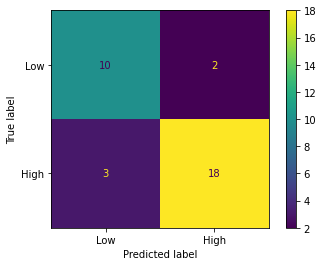

In [35]:
## plot_confusion_matrix() will run the test data down the tree and draw
## a confusion matrix.
n_tree = 8
ConfusionMatrixDisplay.from_estimator(trees[n_tree], 
                                      xtest[n_tree], 
                                      ytest[n_tree], 
                                      display_labels=["Low", "High"])